In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import sklearn
from sklearn.preprocessing import normalize, PolynomialFeatures
from sklearn.model_selection import train_test_split
import eagerpy as ep
from sklearn.metrics import log_loss, mean_squared_error
from sklearn.neighbors import LocalOutlierFactor, KNeighborsRegressor
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNetCV

In [2]:
def load_features (data_file, subject_no):
    csv = pd.read_excel(data_file, subject_no, skiprows = 0)
    nutrients = csv[csv.columns[1:4]].to_numpy()
    insulin = csv[csv.columns[5]].to_numpy()
    DFB = csv[csv.columns[7]].to_numpy()
    sbgl = csv[csv.columns[9]].to_numpy()
    features = np.concatenate((nutrients, insulin.reshape((insulin.shape[0],1)), DFB.reshape((DFB.shape[0],1)), sbgl.reshape((sbgl.shape[0],1))), axis =1)
    print(features.shape)
    return features

def load_features_from_synthetic (data_file, subject_no):
    csv = pd.read_excel(data_file, subject_no, skiprows = 0)
    nutrients = csv[csv.columns[2:5]].to_numpy()
    insulin = csv[csv.columns[5]].to_numpy()
    DFB = csv[csv.columns[6]].to_numpy()
    sbgl = csv[csv.columns[7]].to_numpy()
    features = np.concatenate((nutrients, insulin.reshape((insulin.shape[0],1)), DFB.reshape((DFB.shape[0],1)), sbgl.reshape((sbgl.shape[0],1))), axis =1)
    print(features.shape)
    return features

def plot_with_reg(X, y, xlabel='Carb (g)', ylabel='Insulin (unit)'):
    sort = np.argsort(X)
    X, y = X[sort].reshape(-1, 1), y[sort].reshape(-1, 1)
    reg = Pipeline([('poly',PolynomialFeatures(degree=4)),('linear',LinearRegression(positive=True,fit_intercept=False))]) 
    reg.fit(X,y) 
    y_pred = reg.predict(X)
    plt.figure(figsize=(6.4,3.5))
    plt.scatter(X,y,edgecolors='black')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.plot(X, y_pred, color="black", linewidth=1, ls='--', label="Trend line")
    plt.legend(loc=2)
    plt.show()
    
    return

In [3]:
xlsx = pd.ExcelFile('customCGM.xlsx')

P01 = load_features (xlsx, 'P01')

P02 = load_features (xlsx, 'P02')

P03 = load_features (xlsx, 'P03')

P04 = load_features (xlsx, 'P04')

P05 = load_features (xlsx, 'P05')

P = P05

(29, 6)
(42, 6)
(27, 6)
(34, 6)
(35, 6)


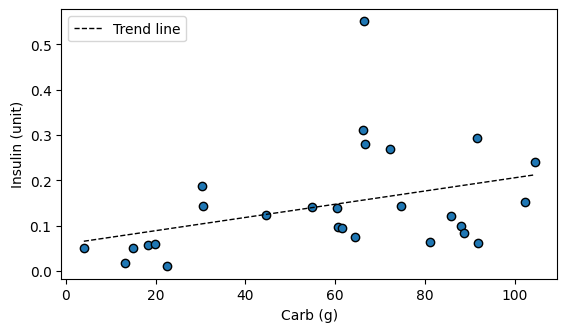

In [9]:
plot_with_reg(P03[:,0],P03[:,3])

In [4]:
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear',LinearRegression(positive=True,fit_intercept=False))])

model.fit(P[:,0:3], P[:,3])

Pipeline(steps=[('poly', PolynomialFeatures(degree=3)),
                ('linear',
                 LinearRegression(fit_intercept=False, positive=True))])

In [75]:
model.predict(P[:,0:3])
print('MSE:',sklearn.metrics.mean_squared_error(P[:,3], model.predict(P[:,0:3])))

MSE: 0.0064592289190244494


In [76]:
data = pd.read_excel('USDA foods/USDA -- foods.xlsx', skiprows = 0)
print(model.predict(data[['Ch','Fat','Fiber']][0:]))
data['Insulin'] = np.round(model.predict(data[['Ch','Fat','Fiber']][0:]),3)

[0.14921424 0.15030235 0.14945739 ... 0.18816742 0.19439215 0.15131144]


C:\Users\Tech Land\Anaconda3\envs\Z\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(
C:\Users\Tech Land\Anaconda3\envs\Z\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but PolynomialFeatures was fitted without feature names
  warnings.warn(


In [78]:
neigh = KNeighborsRegressor(n_neighbors=3)
neigh.fit(P[:,0:3], P[:,4])
print('MSE:',sklearn.metrics.mean_squared_error(P[:,4], neigh.predict(P[:,0:3])))
data['DFB'] = np.round(neigh.predict(data[['Ch','Fat','Fiber']][0:]),3)

MSE: 7.468647301587302


C:\Users\Tech Land\Anaconda3\envs\Z\lib\site-packages\sklearn\base.py:402: UserWarning: X has feature names, but KNeighborsRegressor was fitted without feature names
  warnings.warn(


In [80]:
data

,Meal,Unnamed: 1,Ch,Fat,Fiber,Insulin,DFB
0,0,"MILK,CHOC,FLUID,COMM,WHL,W/ ADDED VIT A & VITA...",10.34,3.39,0.8,0.149,4.843
1,1,"MILK,CHOC,FLUID,COMM,RED FAT",12.13,1.90,0.7,0.150,4.843
2,2,"MILK,CHOC BEV,HOT COCOA,HOMEMADE",10.74,2.34,1.0,0.149,4.843
3,3,"MILK SHAKES,THICK CHOC",21.15,2.70,0.3,0.156,4.843
4,4,KRAFT CHEEZ WHIZ PAST PROCESS CHS SAU,9.20,21.00,0.3,0.149,4.843
...,...,...,...,...,...,...,...
3610,3610,"PUDDINGS,CHOC FLAVOR,LO CAL,INST,DRY MIX",78.20,2.40,6.1,0.190,12.100
3611,3611,"PIE FILLINGS,BLUEBERRY,CND",44.38,0.20,2.6,0.170,7.107
3612,3612,"PUDDINGS,CHOC FLAVOR,LO CAL,REG,DRY MIX",74.42,3.00,10.1,0.188,11.043
3613,3613,"PUDDINGS,ALL FLAVORS XCPT CHOC,LO CAL,INST,DRY...",84.66,0.90,0.8,0.194,11.603


In [81]:
with pd.ExcelWriter("Context/P5 context with LRknn.xlsx") as writer:
    data.to_excel(writer, sheet_name="P5", index=False)